# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9]
# nest = [True, False]
optimizer_ = ['sgd', 'rmsprop', 'adagrad', 'adam']

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for optimizer in optimizer_:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    #print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "optimizer:{}".format(optimizer)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 2.0

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.2913 - acc: 0.2087 - val_loss: 1.9150 - val_acc: 0.3042
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8951 - acc: 0.3114 - val_loss: 1.8154 - val_acc: 0.3296
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7885 - acc: 0.3562 - val_loss: 1.7767 - val_acc: 0.3517
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7128 - acc: 0.3835 - val_loss: 1.8155 - val_acc: 0.3535
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6553 - acc: 0.4080 - val_loss: 1.6917 - val_acc: 0.4012
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6090 - acc: 0.4214 - val_loss: 1.7225 - val_acc: 0.3911
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5737 - acc: 0.4384 - val_loss: 1.6869 - val_acc

50000/50000 [==============================] - 2s 44us/step - loss: 14.4870 - acc: 0.0995 - val_loss: 14.4904 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5017 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5058 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 13.0869 - acc: 0.1027 - val_loss: 2.3973 - val_acc: 0.1036
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.9836 - acc: 0.2760 - val_loss: 1.8417 - val_acc: 0.3367
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7865 - acc: 0.3557 - val_loss: 1.7754 - val_acc: 0.3636
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7076 - acc: 0.3889 - val_loss: 1.7255 - val_acc: 0.3736
Epoch 9/50
50000/50000 [=====================

Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5398 - acc: 0.4513 - val_loss: 1.5234 - val_acc: 0.4594
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4885 - acc: 0.4716 - val_loss: 1.4973 - val_acc: 0.4678
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4584 - acc: 0.4798 - val_loss: 1.4740 - val_acc: 0.4758
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4232 - acc: 0.4917 - val_loss: 1.4760 - val_acc: 0.4848
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3945 - acc: 0.5043 - val_loss: 1.4721 - val_acc: 0.4792
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3762 - acc: 0.5086 - val_loss: 1.4252 - val_acc: 0.4956
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3412 - acc: 0.5234 - val_loss: 1.4224 - val_acc: 0.4899
Epoch 11/50
50000/50000 [===============

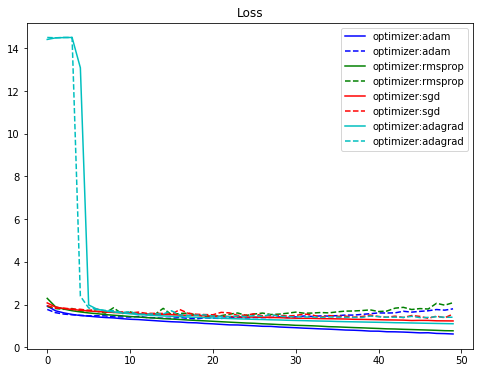

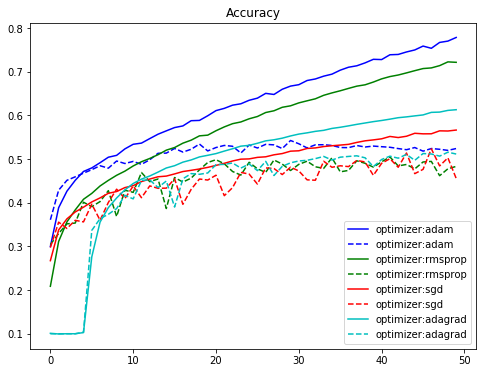

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["b", "g", "r", "c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()